<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/17_Introduction_to_Natural_Language_Processing_in_Python/03_Named-entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Named-entity recognition


You'll learn how to identify the who, what, and where of your texts using pre-trained models on English and non-English text. You'll also learn how to use some new libraries, polyglot and spaCy, to add to your NLP toolbox.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/results_df.csv"
# Read the CSV file
# Apply pd.to_numeric only to relevant columns, excluding 'text'
results_df = pd.read_csv(url)


display(results_df.head())


,max_depth,min_samples_leaf,learn_rate,accuracy
0,4,16,0.624362,95
1,10,14,0.477450,97
2,7,14,0.050067,96
3,5,12,0.023356,96
4,6,12,0.771275,97


**NER with NLTK**  
You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use nltk to find the named entities in this article.

What might the article be about, given the names you found?

Along with nltk, sent_tokenize and word_tokenize from nltk.tokenize have been pre-imported.

In [2]:
import nltk
import requests
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab') # Download the missing resource
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource
nltk.download('maxent_ne_chunker_tab') # Download the missing resource


url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/17_Introduction_to_Natural_Language_Processing_in_Python/dataset/News articles/articles.txt"

try:
    # Fetch the content from the URL
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    article = "\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly."



    # Display the first 500 characters
    print(article[:500])
    # Tokenize the article into sentences: sentences
    sentences = nltk.sent_tokenize(article)

    # Tokenize each sentence into words: token_sentences
    token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # Tag each tokenized sentence into parts of speech: pos_sentences
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

    # Create the named entity chunks: chunked_sentences
    chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

    # Test for stems of the tree with 'NE' tags
    for sent in chunked_sentences:
        for chunk in sent:
            if hasattr(chunk, "label") and chunk.label() == "NE":
                print(chunk)
except requests.exceptions.RequestException as e:
    print(f"Error fetching the article: {e}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


﻿The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll
(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


**Charting practice**  
In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.

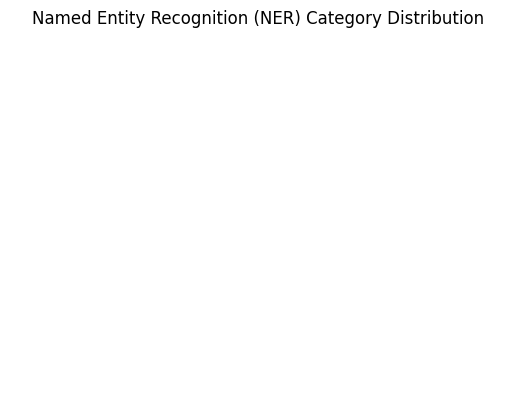

In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
        for chunk in sent:
          if hasattr(chunk, 'label'):

              ner_categories[chunk.label()] += 1

# Create a list from the dictionary keys for the chart labels: labels
labels = sorted(ner_categories, key=ner_categories.get, reverse=True)
values = [ner_categories[l] for l in labels]

# Create the pie chart
plt.title("Named Entity Recognition (NER) Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
plt.show()

**Stanford library with NLTK**  
When using the Stanford library with NLTK, what is needed to get started?

**Comparing NLTK with spaCy NER**
Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as article. To minimize execution times, you'll be asked to specify the keyword argument disable=['tagger', 'parser', 'matcher'] when loading the spaCy model, because you only care about the entity in this exercise.

In [4]:
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

# NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT

ORG Apple
PERSON Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


**spaCy NER Categories**  
Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?

-> NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT

### Multilingual NER with polyglot


**French NER with polyglot I**  
In this exercise and the next, you'll use the polyglot library to identify French entities. The library functions slightly differently than spacy, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in article. Additionally, the Text class of polyglot has been imported from polyglot.text.

In [10]:
!pip install pycurl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.9 MB/s eta 0:00:00


In [ ]:
!pip install polyglot pyicu pycld2 morfessor
!polyglot download embeddings2.fr ner2.fr


In [ ]:
!polyglot download embeddings2.fr
!polyglot download ner2.fr

In [ ]:
!pip install spacy
!python -m spacy download fr_core_news_sm

In [ ]:
#Try Running it Localy dependencies are big for colab to handle and work

from polyglot.text import Text

article = "\ufeffédition abonné\r\n\r\n\r\nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.\r\n\r\n\r\nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)\r\n\r\n\r\nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct.\r\n\r\n\r\nLe quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines !\r\n\r\n\r\nL’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu.\r\n\r\n\r\nIl vient d’une définition de l’IA qui n’a, dans la réalité, jamais pu être mise en pratique : en 1955, elle était vue comme la création de programmes informatiques qui, quoi qu’on leur confie, le feraient un jour mieux que les humains. On pensait que toute caractéristique de l’intelligence humaine pourrait un jour être si précisément décrite qu’il suffirait d’une machine pour la simuler. Ce n’est pas vrai.\r\n\r\n\r\nAngoisses infondées\r\n\r\n\r\nComme le dit un récent Livre blanc sur la question (Pourquoi il ne faut pas avoir peur de l’Intelligence arti\xadficielle, Julien Maldonato, Deloitte, mars 2017), rien ne pourra remplacer un humain dans sa globalité.\r\n\r\n\r\nL’IA, c’est de l’apprentissage automatique doté d’un processus d’ajustement de modèles statistiques à des masses de données, explique l’auteur. Il s’agit d’un apprentissage sur des paramètres pour lesquels une vision humaine n’explique pas pourquoi ils marchent si bien dans un contexte donné.\r\n\r\n\r\nC’est aussi ce que dit le rapport de l’Office parlementaire d’évaluation des choix scientifiques et technologiques (« Pour une intelligence artificielle maîtrisée, utile et démystifiée », 29 mars 2017), pour qui ce côté « boîte noire » explique des angoisses infondées. Ethiquement, se fonder sur l’IA pour des tâches critiques sans bien comprendre le comment..."

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)

# Print the type of ent
print(type(ent))

**French NER with polyglot II**  
Here, you'll complete the work you began in the previous exercise.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.

In [ ]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)


**Note:** You might need to restart the runtime after installing the libraries.

**Spanish NER with polyglot**  
You'll continue your exploration of polyglot now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

The Text object has been created as txt, and each entity has been printed, as you can see in the IPython Shell.

Your specific task is to determine how many of the entities contain the words "Márquez" or "Gabo" - these refer to the same person in different ways!